In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import scipy
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
import datetime
import cufflinks as cf
import plotly.offline as plyo
import plotly as ply
import plotly.graph_objs as go
import yfinance as yf

sns.set()
plyo.init_notebook_mode(connected=True)

In [2]:
Daily_return = pd.read_excel('/Users/andy/Desktop/PM/Daily_return.xlsx')
Daily_return = Daily_return.set_index('Date')
Daily_return.head()

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY,Fund,Optimal Risky Portfolio,Minimum Variance Portfolio,Equally Weight Portfolio,S&P 500,Russell_1000
Date,,,,,,,,,,,,,,,,
2015-01-02,-0.002092,0.004985,0.006674,-0.009513,0.003848,-0.005897,-0.000478,-0.001582,-0.006527,0.008131,0.000000,-0.000308,-0.001583,-0.000245,-0.000340,-0.000315
2015-01-05,-0.019054,-0.031045,-0.009196,-0.028172,-0.008305,-0.020517,-0.006984,-0.022553,-0.014547,-0.015627,-0.016116,-0.017939,-0.012707,-0.017600,-0.018278,-0.018042
2015-01-06,-0.024679,-0.025929,-0.014677,0.000094,0.010092,-0.022833,-0.004914,-0.010663,-0.001088,-0.001707,-0.008056,-0.012980,-0.003131,-0.009631,-0.008894,-0.008955
2015-01-07,-0.002941,0.001526,0.012705,0.014022,-0.006453,0.010600,0.022076,0.007249,0.013893,0.012996,0.012182,0.006513,0.008796,0.008567,0.011630,0.011650
2015-01-08,0.003484,0.022347,0.029418,0.038422,0.021433,0.006836,0.007863,0.023967,0.016725,0.024983,0.016582,0.018920,0.014897,0.019548,0.017888,0.017695


In [3]:
from scipy import stats

Cols = Daily_return.columns[0:14]
Cols

Index(['GOOGL', 'JPM', 'MSFT', 'AAPL', 'VZ', 'AMZN', 'JNJ', 'MMM', 'BRK-B',
       'BMY', 'Fund', 'Optimal Risky Portfolio', 'Minimum Variance Portfolio',
       'Equally Weight Portfolio'],
      dtype='object')

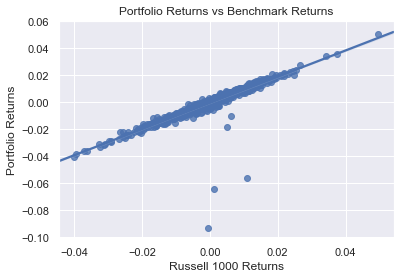

The selected fund's R-square equals to:  0.8072851644737762


In [4]:
def rsquared(x, y):

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

x = Daily_return.loc[:, 'Russell_1000'].values
y = Daily_return.iloc[:, 0:14].values

sns.regplot(x, y[:, 10])

plt.xlabel("Russell 1000 Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()
print("The selected fund's R-square equals to: ", rsquared(x, y[:, 10]))

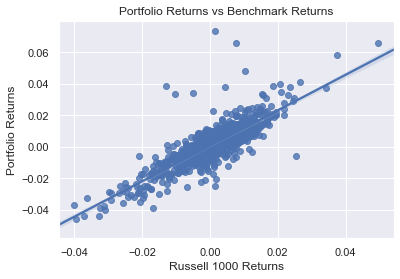

Portfolio's R-square equals to:  0.6870204901133721


In [5]:
sns.regplot(x, y[:, 11])

plt.xlabel("Russell 1000 Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()
print("Portfolio's R-square equals to: ", rsquared(x, y[:, 11]))

In [6]:
AB_5y = pd.DataFrame()
alpha_5y = []
beta_5y = []

for i in range(14):
    b, a, r_value, p_value, std_err = stats.linregress(x, y[:, i])
    # annualize alpha
    alpha_5y.append(round(a * 250, 4))
    beta_5y.append(round(b, 4))
    
AB_5y['alpha_5y'] = alpha_5y
AB_5y['beta_5y'] = beta_5y
AB_5y.index = Cols

AB_5y

,alpha_5y,beta_5y
GOOGL,0.0976,1.1744
JPM,0.0944,1.1717
MSFT,0.1642,1.3077
AAPL,0.1220,1.2342
VZ,0.0616,0.5352
AMZN,0.2688,1.3148
JNJ,0.0409,0.6771
MMM,-0.0349,0.9776
BRK-B,0.0003,0.9780
BMY,-0.0053,0.8302


In [7]:
ret_2017_2019 = Daily_return[(Daily_return.index >= pd.to_datetime('20170101')) & (Daily_return.index <= pd.to_datetime('20191231'))]
ret_2017_2019.head()

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY,Fund,Optimal Risky Portfolio,Minimum Variance Portfolio,Equally Weight Portfolio,S&P 500,Russell_1000
Date,,,,,,,,,,,,,,,,
2017-01-03,0.019635,0.010894,0.007081,0.002849,0.022480,0.005068,0.005468,-0.002912,0.005215,0.017283,0.008966,0.009664,0.011719,0.009306,0.008487,0.008416
2017-01-04,-0.000297,0.001844,-0.004474,-0.001119,-0.001099,0.004657,-0.001640,0.001516,0.001526,0.001355,0.006109,0.000865,-0.000117,0.000227,0.005722,0.006900
2017-01-05,0.006499,-0.009205,0.000000,0.005085,0.002201,0.030732,0.010463,-0.003421,-0.004754,0.016740,-0.003312,0.011364,0.003345,0.005434,-0.000771,-0.001134
2017-01-06,0.014993,0.000116,0.008668,0.011148,-0.014835,0.019912,-0.004792,0.002926,0.000674,-0.002993,0.002215,0.007139,-0.001548,0.003582,0.003517,0.003303
2017-01-09,0.002387,0.000697,-0.003183,0.009159,-0.010890,0.001168,-0.000172,-0.005386,-0.008506,-0.003670,-0.003592,-0.001542,-0.004650,-0.001840,-0.003549,-0.003641


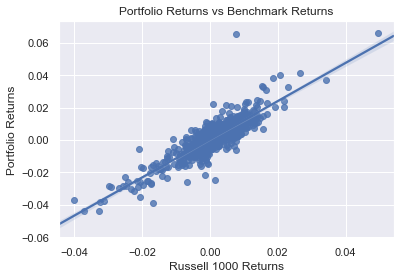

Portfolio's R-square equals to:  0.7556822096058639


In [8]:
sns.regplot(ret_2017_2019['Russell_1000'].values, ret_2017_2019['Optimal Risky Portfolio'].values)

plt.xlabel("Russell 1000 Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()
print("Portfolio's R-square equals to: ", rsquared(ret_2017_2019['Russell_1000'].values, ret_2017_2019['Optimal Risky Portfolio'].values))

In [9]:
x = ret_2017_2019.loc[:, 'Russell_1000'].values
y = ret_2017_2019.iloc[:, 0:14].values

AB_3y = pd.DataFrame()
alpha_3y = []
beta_3y = []

for i in range(14):
    b, a, r_value, p_value, std_err = stats.linregress(x, y[:, i])
    # annualize alpha
    alpha_3y.append(round(a * 250, 4))
    beta_3y.append(round(b, 4))
    
AB_3y['alpha_3y'] = alpha_3y
AB_3y['beta_3y'] = beta_3y
AB_3y.index = Cols

AB_3y

,alpha_3y,beta_3y
GOOGL,0.0312,1.3177
JPM,0.0690,1.0547
MSFT,0.1735,1.3759
AAPL,0.1790,1.3635
VZ,0.0517,0.4307
AMZN,0.1449,1.4915
JNJ,0.0356,0.6540
MMM,-0.0938,1.0902
BRK-B,-0.0068,1.0132
BMY,-0.0105,0.7921


In [10]:
# Tracking return
TR_5y = []

for asset in Cols:
    tr = Daily_return.loc[:, asset] - Daily_return.iloc[:, -1]
    TR_5y.append(tr)

TR_5y_T = pd.DataFrame(TR_5y)
TR_5y = TR_5y_T.T
TR_5y.columns = Cols
TR_5y.head()

,GOOGL,JPM,MSFT,AAPL,VZ,AMZN,JNJ,MMM,BRK-B,BMY,Fund,Optimal Risky Portfolio,Minimum Variance Portfolio,Equally Weight Portfolio
Date,,,,,,,,,,,,,,
2015-01-02,-0.001777,0.005300,0.006988,-0.009198,0.004162,-0.005582,-0.000164,-0.001268,-0.006212,0.008446,0.000315,0.000007,-0.001269,0.000070
2015-01-05,-0.001012,-0.013003,0.008846,-0.010130,0.009737,-0.002475,0.011058,-0.004511,0.003495,0.002414,0.001926,0.000103,0.005335,0.000442
2015-01-06,-0.015724,-0.016974,-0.005722,0.009049,0.019047,-0.013878,0.004041,-0.001708,0.007867,0.007248,0.000899,-0.004025,0.005824,-0.000675
2015-01-07,-0.014591,-0.010124,0.001055,0.002372,-0.018103,-0.001050,0.010426,-0.004401,0.002243,0.001346,0.000532,-0.005137,-0.002854,-0.003083
2015-01-08,-0.014211,0.004651,0.011723,0.020727,0.003738,-0.010859,-0.009833,0.006272,-0.000971,0.007288,-0.001113,0.001224,-0.002799,0.001852


In [11]:
information_ratio_5y = np.sqrt(252) * TR_5y.mean() / TR_5y.std()

INR_5y = pd.DataFrame(information_ratio_5y, columns=['5 year Information ratio'])
INR_5y

,5 year Information ratio
GOOGL,0.644263
JPM,0.796069
MSFT,1.233744
AAPL,0.778287
VZ,0.098777
AMZN,1.274528
JNJ,0.067251
MMM,-0.257526
BRK-B,-0.018807
BMY,-0.095157


In [12]:
TR_3y = []

for asset in Cols:
    tr = ret_2017_2019.loc[:, asset] - ret_2017_2019.iloc[:, -1]
    TR_3y.append(tr)

TR_3y_T = pd.DataFrame(TR_3y)
TR_3y = TR_3y_T.T
TR_3y.columns = Cols

information_ratio_3y = np.sqrt(252) * TR_3y.mean() / TR_3y.std()

INR_3y = pd.DataFrame(information_ratio_3y, columns=['3 year Information ratio'])
INR_3y

,3 year Information ratio
GOOGL,0.448824
JPM,0.562281
MSFT,1.656053
AAPL,1.262154
VZ,-0.116505
AMZN,1.012528
JNJ,-0.056884
MMM,-0.515064
BRK-B,-0.047411
BMY,-0.164373


In [13]:
indicators = pd.concat([AB_3y, AB_5y, INR_3y, INR_5y], axis=1, sort=False)

indicators

,alpha_3y,beta_3y,alpha_5y,beta_5y,3 year Information ratio,5 year Information ratio
GOOGL,0.0312,1.3177,0.0976,1.1744,0.448824,0.644263
JPM,0.0690,1.0547,0.0944,1.1717,0.562281,0.796069
MSFT,0.1735,1.3759,0.1642,1.3077,1.656053,1.233744
AAPL,0.1790,1.3635,0.1220,1.2342,1.262154,0.778287
VZ,0.0517,0.4307,0.0616,0.5352,-0.116505,0.098777
AMZN,0.1449,1.4915,0.2688,1.3148,1.012528,1.274528
JNJ,0.0356,0.6540,0.0409,0.6771,-0.056884,0.067251
MMM,-0.0938,1.0902,-0.0349,0.9776,-0.515064,-0.257526
BRK-B,-0.0068,1.0132,0.0003,0.9780,-0.047411,-0.018807
BMY,-0.0105,0.7921,-0.0053,0.8302,-0.164373,-0.095157


In [14]:
up = Daily_return[Daily_return > 0].count()
up

GOOGL                         664
JPM                           647
MSFT                          681
AAPL                          668
VZ                            648
AMZN                          690
JNJ                           661
MMM                           669
BRK-B                         640
BMY                           670
Fund                          646
Optimal Risky Portfolio       710
Minimum Variance Portfolio    682
Equally Weight Portfolio      705
S&P 500                       675
Russell_1000                  672
dtype: int64

In [15]:
down = Daily_return[Daily_return < 0].count()
down

GOOGL                         593
JPM                           603
MSFT                          564
AAPL                          588
VZ                            598
AMZN                          567
JNJ                           593
MMM                           585
BRK-B                         614
BMY                           582
Fund                          589
Optimal Risky Portfolio       548
Minimum Variance Portfolio    576
Equally Weight Portfolio      553
S&P 500                       582
Russell_1000                  583
dtype: int64

In [16]:
up_3y = ret_2017_2019[ret_2017_2019 > 0].count()
up_3y

GOOGL                         402
JPM                           388
MSFT                          425
AAPL                          414
VZ                            396
AMZN                          422
JNJ                           404
MMM                           404
BRK-B                         402
BMY                           412
Fund                          411
Optimal Risky Portfolio       447
Minimum Variance Portfolio    420
Equally Weight Portfolio      438
S&P 500                       425
Russell_1000                  421
dtype: int64

In [17]:
down_3y = ret_2017_2019[ret_2017_2019 < 0].count()
down_3y

GOOGL                         351
JPM                           362
MSFT                          321
AAPL                          339
VZ                            350
AMZN                          331
JNJ                           347
MMM                           347
BRK-B                         350
BMY                           338
Fund                          327
Optimal Risky Portfolio       307
Minimum Variance Portfolio    334
Equally Weight Portfolio      316
S&P 500                       328
Russell_1000                  332
dtype: int64